# Simulation of Projectile Motion in 2D - with air resistance.

In [149]:
import numpy as np

# Define the initial conditions of the motion
v0 = 60.0
theta = 35.0*np.pi/180.0

y0 = 0.001
v0y = v0*np.sin(theta)
x0 = 0.0
v0x = v0*np.cos(theta)

# Other constants - golf ball - D = 0.0427m, m = 0.04593kg
Cd = 0.20 # drag coefficient
area = 0.001432 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 0.04593 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass

g = 9.80524

In [152]:
# Define the time interval, dt, for the simulation
dt = 0.001

y = []
x = []
t = []
vy = []
vx = []

yNoAir = []
xNoAir = []
vyNoAir = []
vxNoAir = []

y.append(y0)
x.append(x0)
vy.append(v0y)
vx.append(v0x)
t.append(0.0)

yNoAir.append(y0)
xNoAir.append(x0)
vyNoAir.append(v0y)
vxNoAir.append(v0x)

y_current = y[0]
x_current = x[0]
vy_current = vy[0]
vx_current = vx[0]
t_current = t[0]

y_currentNoAir = y[0]
x_currentNoAir = x[0]
vy_currentNoAir = vy[0]
vx_currentNoAir = vx[0]

n=1
while (y_currentNoAir > 0):
    if y_current > 0:
        y_current += vy_current*dt
        x_current += vx_current*dt
    y_currentNoAir += vy_currentNoAir*dt
    x_currentNoAir += vx_currentNoAir*dt
    
    normV = np.sqrt(vx_current**2+vy_current**2)
    ax= air_const*normV*vx_current
    ay= -g + air_const*normV*vy_current
                      
    axNoAir = 0.0
    ayNoAir = -g
                      
    if y_current > 0:
        vy_current += ay*dt
        vx_current += ax*dt
    else:
        vy_current = 0
        vx_current = 0
    vy_currentNoAir += ayNoAir*dt
    vx_currentNoAir += axNoAir*dt
                      
    t_current += dt
                      
    y.append(y_current)
    x.append(x_current)
    vy.append(vy_current)
    vx.append(vx_current)
    t.append(t_current)
    
    yNoAir.append(y_currentNoAir)
    xNoAir.append(x_currentNoAir)
    vyNoAir.append(vy_currentNoAir)
    vxNoAir.append(vx_currentNoAir)
                      
    n = n + 1


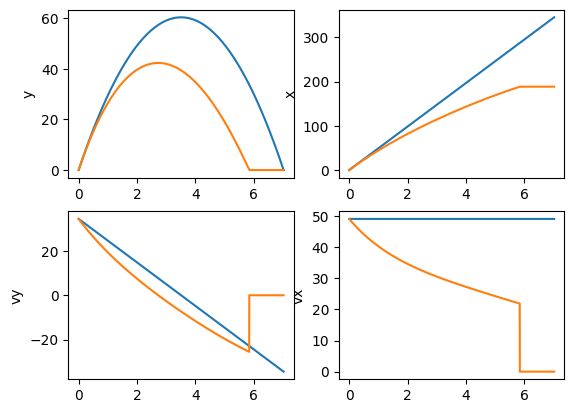

In [153]:
import matplotlib.pyplot as plt

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=2, ncols=2) 

# On the first axis, plot the y value 
axs[0][0].plot(t,yNoAir) 
axs[0][0].plot(t,y) 
axs[0][0].set_ylabel('y') 

# On the second axis, plot the vy value 
axs[1][0].plot(t,vyNoAir) 
axs[1][0].plot(t,vy) 
axs[1][0].set_ylabel('vy')

# On the third axis, plot the x value 
axs[0][1].plot(t,xNoAir) 
axs[0][1].plot(t,x) 
axs[0][1].set_ylabel('x') 

# On the fourth axis, plot the vx value 
axs[1][1].plot(t,vxNoAir) 
axs[1][1].plot(t,vx) 
axs[1][1].set_ylabel('vx')

plt.show()

In [154]:
from matplotlib import animation
from IPython.display import HTML
import numpy as np

FPS=30
plt.style.use('default')

x = np.array(x)
y = np.array(y)
xNoAir = np.array(xNoAir)
yNoAir = np.array(yNoAir)
xm = xNoAir.min()-10
xp = xNoAir.max()+10
ym = yNoAir.min()-10
yp = yNoAir.max()+10

# Set up the figure
fig = plt.figure(figsize=(10, 5), dpi=60)

if (xp>yp):
    ax = plt.axes(xlim=(xm, xp), ylim=(xm/2, xp/2))
else:
    ax = plt.axes(xlim=(ym, yp), ylim=(ym/2, yp/2))
ax.set_aspect('equal')
ax.axis('on')

# Define the different elements in the animation
ball1 = plt.Circle((x[0], y[0]), xp/150.0, fc="black")
ball2 = plt.Circle((xNoAir[0], yNoAir[0]), xp/150.0, fc="red")
ax.add_patch(ball1)
ax.add_patch(ball2)


# Calculates the number of frames
framesNum = int(FPS*t[-1])+1

# Animation function. This is called sequentially.
def animate(j):
    i = j*int(n/framesNum)
    ball1.center = (x[i], y[i])
    ball2.center = (xNoAir[i], yNoAir[i])
    
# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS, repeat=False)
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())